In [2]:
# BIGMap: Bayesian Information Gain Navigation

import ipywidgets as widgets
from IPython.display import HTML
HTML('<iframe src=https://perso.telecom-paristech.fr/wliu/BIGMap.html width=800 height=600></iframe>')

# in order to use BIGnav, select a target from the pulldown menu first. E.g. Sdyney
# Toggle button switches between BIGnav and standard pan and zoom

In [26]:
import random
import math
import matplotlib.pyplot as plt

# we will work on a simpler version

Cities = []

# 50 cities on a 1-D line starting with a uniform distribution
for i in range(50):
    Cities.append(1/50)

## TO DO: try different distributions:
# a. non-uniform
# for i in range(10):
#     Cities.append(0.01)
# for i in range(40):
#     Cities.append(0.0225)

# a map-like distribution: big cities surrounded by smaller cities
# Big_cities = [0,10,20,30,40]
# for i in range(50):
#     Cities.append(1/50)
# for j in Big_cities:
#     Cities[j] = 0.15
    
print(Cities)

# A view is defined as follows. A maximum zoom factor right - left = 2
len_view = 2

# possible user input:
# 0: go left; 1: zoom in; 2: go right; 3+: clicking on each city

N_input = 3 + len(Cities)
    
updates = Cities

Uncertainty = []
InformationGain = []

[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]


In [27]:
# To compute entropy with probability

def H(List):
    sum = 0
    for i in range(len(List)):
        if List[i] != 0: 
            sum = sum + List[i] * math.log(List[i],2)
    return -sum

#print(H(Cities))

In [28]:
# To define what is supposed to be the user input given a city and a view
def sinput(target, view):
    sinp = 0
    if target <= view[1] and target >= view[0] and view[1] - view[0] == len_view: sinp = target + 3
    elif target <= view[1] and target >= view[0] and view[1] - view[0] > len_view: sinp = 1
    elif target < view[0]: sinp = 0
    elif target > view[1]: sinp = 2
    return sinp

In [29]:
# print(sinput(15,[14,16]))

In [30]:
# Define user behavior: user can go left, go right, zoom in and click on each city
## TO DO: try change this and see how BIGnav behaves

def Pr_u_t_v(user_input,target,view):
    
    comp = sinput(target, view)
    p = 0
      
    if user_input == 0:
        if comp == 0: p = 0.9
        elif comp == 1: p = 0.05
        elif comp == 2: p = 0.05
        elif comp > 3: p = 0
        
    if user_input == 1:
        if comp == 0: p = 0.05
        elif comp == 1: p = 0.9
        elif comp == 2: p = 0.05
        elif comp > 3: p = 0
    
    if user_input == 2:
        if comp == 0: p = 0.05
        elif comp == 1: p = 0.05
        elif comp == 2: p = 0.9
        elif comp > 3: p = 0

    if user_input > 2:
        if comp == target + 3: p = 1
        elif comp == 0: p = 0
        elif comp == 1: p = 0
        elif comp == 2: p = 0
            
    return p

In [31]:
def Pr_u_v(user_input,view):
    sum = 0
    for i in range(len(updates)):
        sum = sum + Pr_u_t_v(user_input,i,view) * updates[i] 
    return sum

In [32]:
widgets.HTMLMath(
    value=r"In Update, we use Bayes' rule to update the computer's prior knowledge: $$P(\Theta=\theta \mid X=x,Y=y) = \frac{P(Y = y \mid \Theta=\theta, X=x) P(\Theta = \theta)}{ P(Y=y | X=x)}$$ where: $$P(Y=y \mid X=x) = \sum\limits_{\theta'} P(Y = y \mid \Theta = \theta', X=x) P(\Theta = \theta')$$"
)

In [33]:
# after user input, update the probability of all potential targets

def Update(user_input,view):
    # compute entropy before updating
    H_before = H(updates)
    Uncertainty.append(H_before)
    # update probability distribution
    temp = Pr_u_v(user_input,view)
    for i in range(len(updates)):
        updates[i] = updates[i] * Pr_u_t_v(user_input,i,view) / temp
    # compute entropy after updating
    H_after = H(updates)
    print("The actual information gain is: ", abs(H_after - H_before))
    InformationGain.append(abs(H_after - H_before))

In [34]:
widgets.HTMLMath(
    value=r"Expected information gain is computed as follows: $$IG(\Theta | X=x, Y ) = H(\Theta) - H(\Theta | X=x, Y)$$ we use Bayes' theorem for entropies to convert the equation to: $$IG(\Theta | X=x, Y ) = H(Y|X=x) - H(Y | \Theta, X=x)$$ where the first term is given by $$-\sum_{y} P(Y=y | X=x) \log_2 P(Y=y | X=x)$$ and the second term is given by: $$-\sum_{y,\theta} P(\Theta = \theta) P(Y=y | \Theta = \theta , X=x)\log_2P(Y=y | \Theta = \theta , X=x)$$",
)

In [35]:
# given a view, compute the expected information gain
    
def E_IG(view):
    temp1 = 0
    temp2 = 0
    sum1 = 0
    sum2 = 0
    
    for i in range(N_input):
        if Pr_u_v(i,view) != 0: 
            temp1 = - Pr_u_v(i,view) * math.log(Pr_u_v(i,view),2)
        else: temp1 = 0
        sum1 = sum1 + temp1
    
    for j in range(len(Cities)):
        for i in range(N_input):
            if Pr_u_t_v(i,j,view) != 0:
                temp2 = - updates[j] * Pr_u_t_v(i,j,view) * math.log(Pr_u_t_v(i,j,view),2)
            else: temp2 = 0
        sum2 = sum2 + temp2
    
    return sum1 - sum2

In [36]:
# go over all possible feedback, compute the maximum expected information gain

def Max_E_IG():
    max_IG = 0
    if (updates[Target] > 0.9):
        print("You have found your target!")
        InformationGain.append(Uncertainty[len(Uncertainty)-1])
        Uncertainty.append(0)
        return [Target-1, Target]
    else:
        for l in range(0,len(updates)-2):
            for r in range(l+len_view, len(updates)):
                if (E_IG([l,r]) > max_IG):
                    opt_r = r
                    opt_l = l
                    max_IG = E_IG([l,r])
        print("The most informative feedback is: ", [opt_l,opt_r])
        return [opt_l,opt_r]

Your target is: City 2
The most informative feedback is:  [23, 25]
Your input?0
The actual information gain is:  0.8105050904409454
0.04109589041095888
The most informative feedback is:  [11, 13]
Your input?0
The actual information gain is:  1.0670104218670309
0.08639999999999995
The most informative feedback is:  [4, 6]
Your input?0
The actual information gain is:  1.393099741038871
0.2350665054413546
The most informative feedback is:  [2, 4]
Your input?5
The actual information gain is:  1.3732409364278806
0.5
The most informative feedback is:  [0, 2]
Your input?5
The actual information gain is:  1.0
1.0
You have found your target!


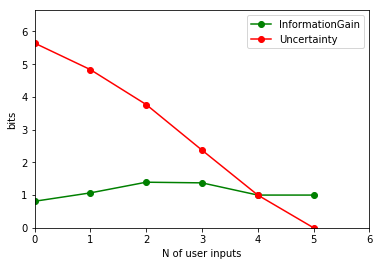

In [37]:
#randomly assign a target
Target = random.randint(0, 50)

print("Your target is: City", Target)
# To start with, BIGnav finds the initial view

feedback = Max_E_IG()

# before tagrte is found
while (updates[Target] < 0.9):
    # receive user input
    userinput = int(input("Your input?"))
    Update(userinput, feedback)
    print(updates[Target])
    feedback = Max_E_IG()
    
# print(InformationGain)
# print(Uncertainty)

# Visualize your interaction

X_axis = [1]*len(Uncertainty)
for i in range(len(X_axis)): X_axis[i] = i
    
fig, ax = plt.subplots()
ax.plot(X_axis, InformationGain, 'go-', label = 'InformationGain')
ax.plot(X_axis, Uncertainty, 'ro-', label = 'Uncertainty')

plt.xlabel('N of user inputs')
plt.ylabel('bits')
legend = ax.legend(loc='upper right')
ax.legend(loc='upper right', fancybox=True, shadow=False)
plt.axis([0, len(Uncertainty), 0, Uncertainty[0]+1])

plt.show()


In [ ]:
## TO DO: regularize the search for optimization

In [ ]:
## TO DO: think about how to apply BIG to other interaction tasks